# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_CREDIT_MOD14.csv", delimiter=';')

df.head(10)

C:\Users\prisc\AppData\Local\Temp\ipykernel_436\1275777054.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("CHURN_CREDIT_MOD14.csv", delimiter=';')


,CustomerId,Sobrenome,Credit_Score,Pais,Genero,Idade,Tempo_Credito,Balance,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Churn
0,15813451,Fleetwood-Smith,677,Spain,Male,18.0,5,134796.87,2,1.0,0.0,114858.9,0.0
1,15641688,Collier,644,Spain,Female,18.0,7,0.00,1,0.0,1.0,74564.41,0.0
2,15757821,Burgess,641,Spain,Male,18.0,1,0.00,2,0.0,1.0,41542.95,0.0
3,15673180,Onyekaozulu,826,Spain,Male,18.0,2,0.00,2,0.0,1.0,16245.25,0.0
4,15664543,Tuan,774,Spain,Female,18.0,1,185891.54,1,1.0,0.0,175072.41,0.0
5,15673180,Onyekaozulu,688,Spain,Female,18.0,2,0.00,2,1.0,0.0,98349.13,0.0
6,15641688,Collier,803,Spain,Male,18.0,6,0.00,1,0.0,0.0,59645.24,1.0
7,15672940,Yevseyev,578,Spain,Female,18.0,8,71843.15,2,0.0,1.0,112649.22,0.0
8,15694192,Nwankwo,598,Spain,Male,18.0,6,0.00,2,0.0,1.0,173783.38,0.0
9,15585867,Iroawuchi,624,Spain,Female,18.0,6,0.00,2,0.0,1.0,117038.96,0.0


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [31]:
#seu código aqui

df= pd.read_csv('CHURN_TELECON_MOD08_TAREFA.csv', delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


In [10]:
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

In [35]:
df.info


<bound method DataFrame.info of       customerID  Genero  Idoso Casado Dependents  Tempo_como_Cliente  \
0     7590-VHVEG  Female      0    Yes         No                   1   
1     5575-GNVDE    Male      0     No         No                  34   
2     3668-QPYBK    Male      0     No         No                   2   
3     7795-CFOCW    Male      0     No         No                  45   
16    8191-XWSZG       F      0     No         No                  52   
...          ...     ...    ...    ...        ...                 ...   
2495  6188-UXBBR  Female      0    Yes         No                  38   
2496  2333-KWEWW    Male      0     No         No                  18   
2497  5702-SKUOB  Female      0    Yes         No                   4   
2498  1134-YWTYF    Male      0    Yes         No                  27   
2499  6061-GWWAV    Male      0     No        Yes                  41   

      PhoneService Servico_Internet    Servico_Seguranca      Suporte_Tecnico  \
0         

# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [15]:
#seu código aqui

df.isnull().values.any()

df.isnull().sum()

(df.isnull().sum() / len(df)) *100


customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [18]:
#seu código aqui

df[df['Genero'].isnull()]

df.dropna(subset=['Genero'], inplace=True)

df['Genero'].isnull().sum()

0

# Nessa coluna as linhas com dados faltantes foram excluídas por ser uma % baixa.

C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

**Dica variáveis numéricas:** Não se esqueça de verificar a distrbuição dos dados, média e mediana.

**Dica variáveis categóricas:** Caso precise substituir uma variável categórica utilize um gráfico de barras para verificar a que mais aparece e utilizar ela na substituição.
Ou você pode optar por excluir a coluna, mas justifique sua escolha.

Caso opte por substituir você pode utilizar a função fillna:
df['SUACOLUNA'].fillna("VALOR QUE SUBSTITUIRA O NULO", inplace=True)
Ela funcionará como a replace.

In [6]:
#seu código aqui

df['PhoneService']= df['PhoneService'].replace({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].astype(float)

df['PhoneService'].mean()


C:\Users\prisc\AppData\Local\Temp\ipykernel_15076\1534663589.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PhoneService']= df['PhoneService'].replace({'Yes': 1, 'No': 0})


0.9145383104125737

In [36]:
df['PhoneService'].fillna("0.9145", inplace=True)

In [51]:
df['Pagamento_Mensal'].mean()

65.60756321839081

In [50]:
df['Pagamento_Mensal'].median()

71.45

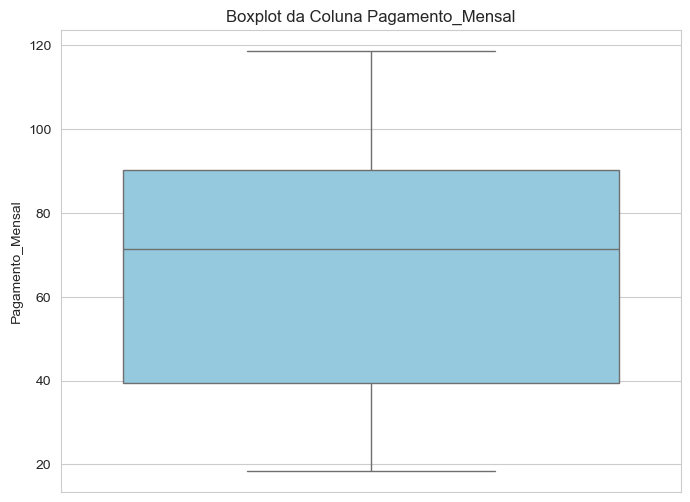

In [32]:
sns.set_style('whitegrid')

# Plota o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna Pagamento_Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

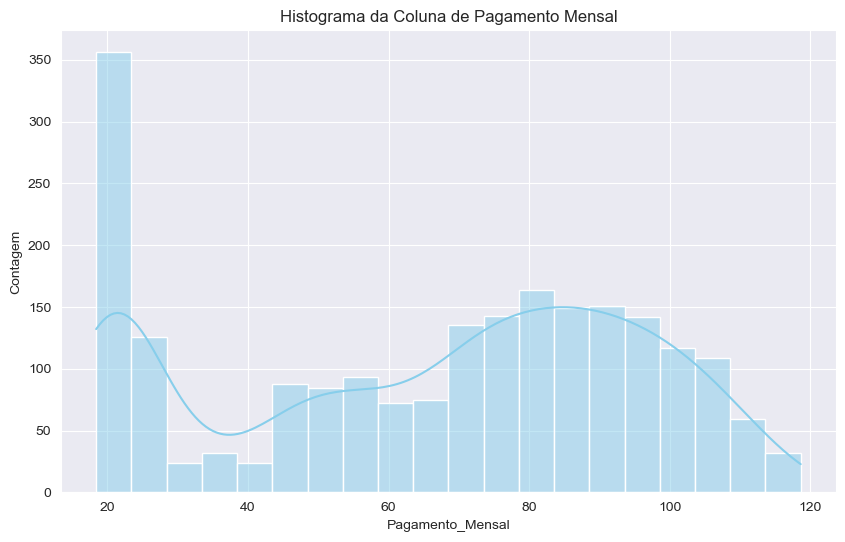

In [33]:
sns.set_style('darkgrid')

# Plotando um histograma dos pagamentos para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Pagamento Mensal')
plt.xlabel('Pagamento_Mensal')
plt.ylabel('Contagem')
plt.show()

# Há um numero alto de pagamentos de valor 20, diminuidos entre 20 e 40.
Dúvida esses pagamentos de valor 20 é considerado outliar?

In [38]:
df['Pagamento_Mensal'].fillna("65.6075", inplace=True)

In [47]:
df['Churn']= df['Churn'].replace({'Yes': 2, 'No': 1})

df['Churn'] = df['Churn'].astype(float)

df['Churn'].mean()


1.0

In [49]:
df['Churn'].median()

1.0

In [39]:
df['Churn'].fillna("1.0", inplace=True)

In [43]:
df.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),65.6075,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,65.6075,151.65,Yes


# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [46]:
#seu código aqui

df['Genero'].unique()


array(['Female', 'Male', nan, 'F', 'M', 'f'], dtype=object)

In [48]:
# Substituir "F" por "Female" e "M" por "Male"
df["Genero"] = df["Genero"].replace({"F": "Female", "M": "Male", "f": "Female"})

# Exibindo o DataFrame modificado
print(df)

      customerID  Genero  Idoso Casado Dependents  Tempo_como_Cliente  \
0     7590-VHVEG  Female      0    Yes         No                   1   
1     5575-GNVDE    Male      0     No         No                  34   
2     3668-QPYBK    Male      0     No         No                   2   
3     7795-CFOCW    Male      0     No         No                  45   
4     9237-HQITU     NaN      0     No         No                   2   
...          ...     ...    ...    ...        ...                 ...   
2495  6188-UXBBR  Female      0    Yes         No                  38   
2496  2333-KWEWW    Male      0     No         No                  18   
2497  5702-SKUOB  Female      0    Yes         No                   4   
2498  1134-YWTYF    Male      0    Yes         No                  27   
2499  6061-GWWAV    Male      0     No        Yes                  41   

     PhoneService Servico_Internet    Servico_Seguranca      Suporte_Tecnico  \
0              No              DSL         

# [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixand